In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/all_youtube_analytics.csv")

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/all_youtube_analytics.csv")

# Step 1: Aggregate by video_id
df_agg = df.groupby('video_id').agg({
    'views': 'sum',
    'likes': 'sum',
    'comments': 'sum',
    'shares': 'sum',
    'estimatedMinutesWatched': 'sum',
    'averageViewDuration': 'mean',
    'averageViewPercentage': 'mean',
    'subscribersGained': 'sum',
    'subscribersLost': 'sum'
}).reset_index()

# Step 2: Feature Engineering
df_agg['engagement_rate'] = (df_agg['likes'] + df_agg['comments'] + df_agg['shares']) / df_agg['views'].replace(0, 1)
df_agg['net_subscribers'] = df_agg['subscribersGained'] - df_agg['subscribersLost']
df_agg['views_per_minute'] = df_agg['views'] / df_agg['estimatedMinutesWatched'].replace(0, 1)

# Step 3: Select features
features = ['likes', 'comments', 'shares', 'estimatedMinutesWatched',
            'averageViewDuration', 'averageViewPercentage',
            'engagement_rate', 'net_subscribers', 'views_per_minute']
X = df_agg[features]
y = df_agg['views']  # Continuous target

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



In [ ]:
# Step 6: Train the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Step 7: Predict on test set
y_pred = lin_model.predict(X_test)

# Step 8: Visualize actual vs predicted views
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.close()

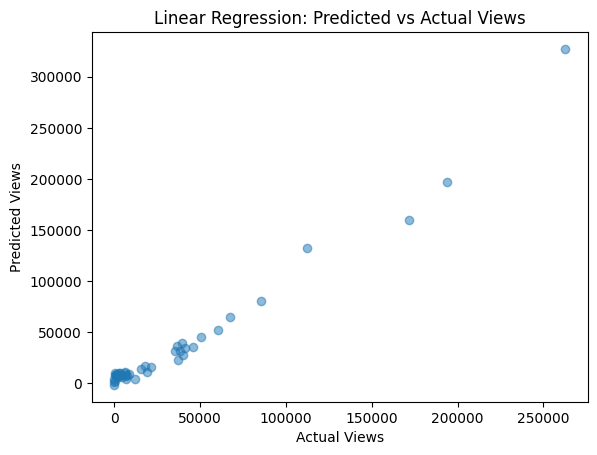

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Linear Regression: Predicted vs Actual Views")
plt.show()


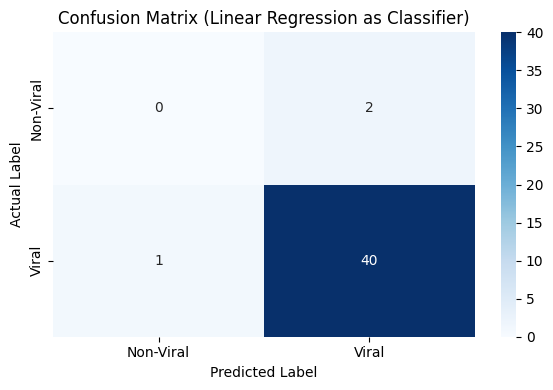

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the threshold for 'viral' (top 25% views)
threshold = df['views'].quantile(0.75)

# Convert actual and predicted values to binary (1 = Viral, 0 = Non-Viral)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Viral', 'Viral'],
            yticklabels=['Non-Viral', 'Viral'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Linear Regression as Classifier)')
plt.tight_layout()

# Show the plot
plt.show()

# Save the confusion matrix to a file
plt.savefig('confusion_matrix_linear_regression.png')


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     35371
           1       0.94      0.90      0.92     11607

    accuracy                           0.96     46978
   macro avg       0.96      0.94      0.95     46978
weighted avg       0.96      0.96      0.96     46978

SVM Accuracy: 0.9621524969134488


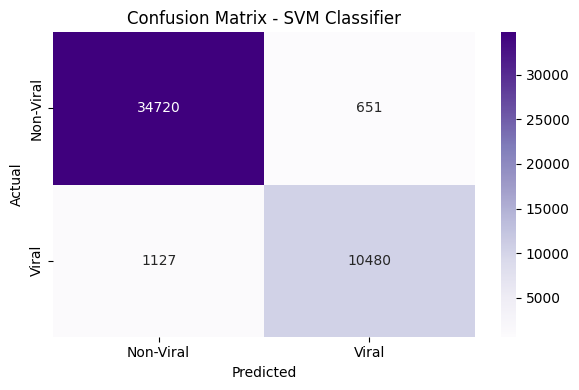

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('/content/all_youtube_analytics.csv')

# Drop rows with missing values in key columns
df = df.dropna(subset=['views', 'likes', 'comments', 'shares', 'estimatedMinutesWatched', 'averageViewPercentage'])

# Define viral label (top 25% views)
threshold = df['views'].quantile(0.75)
df['viral'] = (df['views'] > threshold).astype(int)

# Select features and target
features = ['likes', 'comments', 'shares', 'estimatedMinutesWatched', 'averageViewPercentage']
X = df[features]
y = df['viral']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Viral', 'Viral'],
            yticklabels=['Non-Viral', 'Viral'])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png')
plt.show()


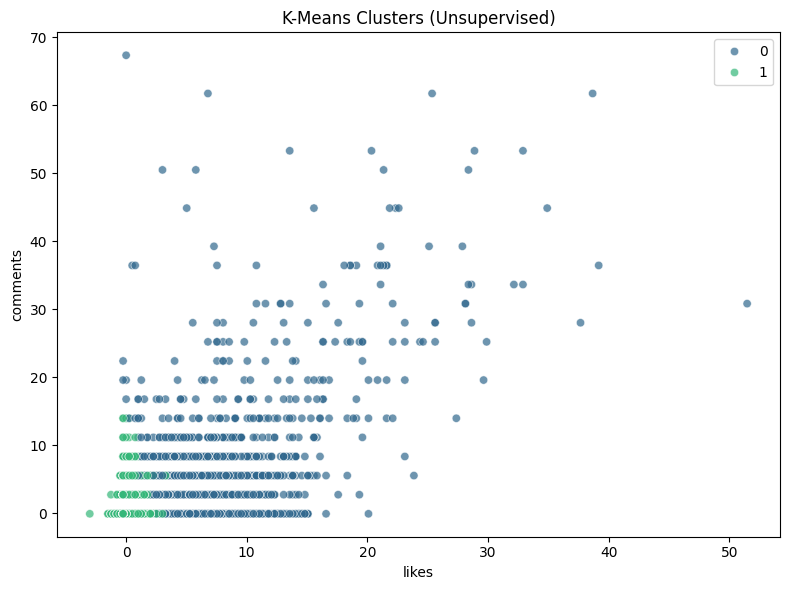

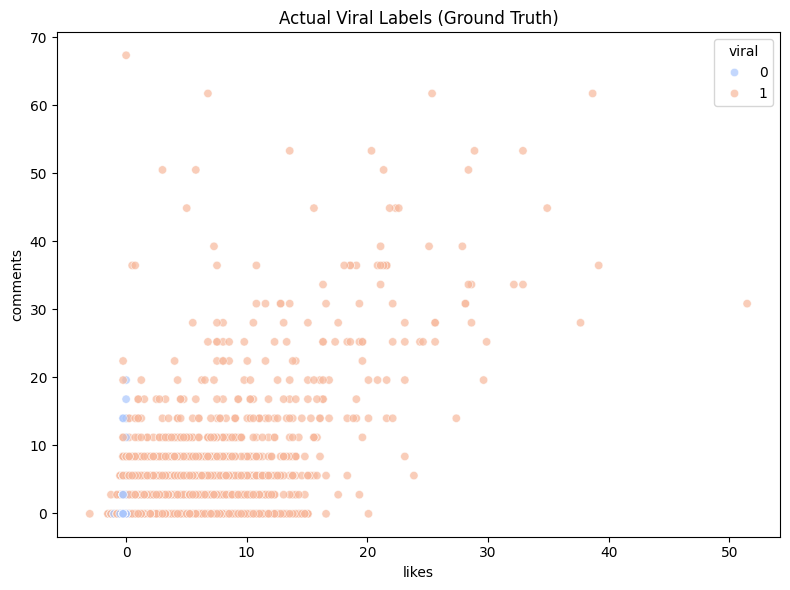

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/all_youtube_analytics.csv')

# Drop missing values
df = df.dropna(subset=['views', 'likes', 'comments', 'shares', 'estimatedMinutesWatched', 'averageViewPercentage'])

# Define viral label (for visualization, not used by K-Means)
threshold = df['views'].quantile(0.75)
df['viral'] = (df['views'] > threshold).astype(int)

# Select features
features = ['likes', 'comments', 'shares', 'estimatedMinutesWatched', 'averageViewPercentage']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to DataFrame
df['cluster'] = clusters

# Plot K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('K-Means Clusters (Unsupervised)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.tight_layout()
plt.savefig('kmeans_clusters.png')
plt.show()

# Plot actual viral labels for comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['viral'], palette='coolwarm', alpha=0.7)
plt.title('Actual Viral Labels (Ground Truth)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.tight_layout()
plt.savefig('actual_viral_labels.png')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
features = ['likes', 'comments', 'shares', 'estimatedMinutesWatched']
X = df[features]
y = df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict views
y_pred = lin_model.predict(X_test)


#Comparison of three models

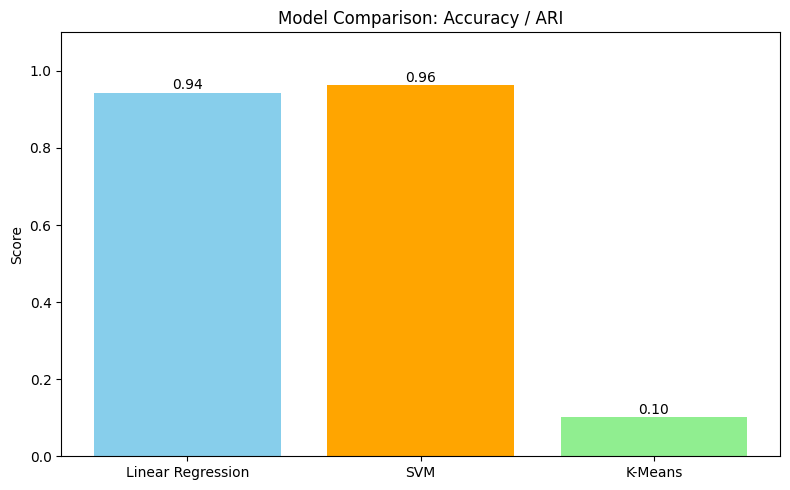

In [ ]:
from sklearn.metrics import accuracy_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Linear Regression → Binary prediction
threshold = df['views'].quantile(0.75)
y_pred_linreg_binary = (y_pred > threshold).astype(int)

# Accuracy from Linear Regression (as classifier)
lin_acc = accuracy_score(y_test > threshold, y_pred_linreg_binary)

# Accuracy from SVM (assumes y_pred_svm exists)
svm_acc = accuracy_score(y_test > threshold, y_pred_svm)

# ARI from K-Means (unsupervised)
kmeans_ari = adjusted_rand_score(df['viral'], df['cluster'])

# Plot comparison
models = ['Linear Regression', 'SVM', 'K-Means']
scores = [lin_acc, svm_acc, kmeans_ari]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Model Comparison: Accuracy / ARI')
plt.ylabel('Score')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{bar.get_height():.2f}", ha='center')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig("simple_model_comparison.png")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score


In [ ]:
threshold = df['views'].quantile(0.75)
y_test_binary = (y_test > threshold).astype(int)  # Ground truth binary labels


In [ ]:
y_pred_linreg_binary = (y_pred > threshold).astype(int)

lin_acc = accuracy_score(y_test_binary, y_pred_linreg_binary)
lin_prec = precision_score(y_test_binary, y_pred_linreg_binary)
lin_rec = recall_score(y_test_binary, y_pred_linreg_binary)
lin_f1 = f1_score(y_test_binary, y_pred_linreg_binary)


In [ ]:
svm_acc = accuracy_score(y_test_binary, y_pred_svm)
svm_prec = precision_score(y_test_binary, y_pred_svm)
svm_rec = recall_score(y_test_binary, y_pred_svm)
svm_f1 = f1_score(y_test_binary, y_pred_svm)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# Example: Assume 2 clusters in KMeans
# Relabel clusters if needed so cluster 1 maps to viral (1), cluster 0 to non-viral (0)
from scipy.stats import mode

# Get actual and predicted labels
true_labels = df['viral']
predicted_clusters = df['cluster']

# Match cluster labels to actual labels
if confusion_matrix(true_labels, predicted_clusters)[0,0] + confusion_matrix(true_labels, predicted_clusters)[1,1] < \
   confusion_matrix(true_labels, 1 - predicted_clusters)[0,0] + confusion_matrix(true_labels, 1 - predicted_clusters)[1,1]:
    predicted_clusters = 1 - predicted_clusters  # Flip if needed

# Now calculate metrics
kmeans_acc = accuracy_score(true_labels, predicted_clusters)
kmeans_prec = precision_score(true_labels, predicted_clusters)
kmeans_rec = recall_score(true_labels, predicted_clusters)
kmeans_f1 = f1_score(true_labels, predicted_clusters)


#Summary of models

In [ ]:
print("Linear Regression:")
print(f"Accuracy: {lin_acc:.2f}, Precision: {lin_prec:.2f}, Recall: {lin_rec:.2f}, F1: {lin_f1:.2f}")

print("\nSVM:")
print(f"Accuracy: {svm_acc:.2f}, Precision: {svm_prec:.2f}, Recall: {svm_rec:.2f}, F1: {svm_f1:.2f}")

print("\nK-Means:")
print(f"Accuracy: {kmeans_acc:.2f}, Precision: {kmeans_prec:.2f}, Recall: {kmeans_rec:.2f}, F1: {kmeans_f1:.2f}")


Linear Regression:
Accuracy: 0.94, Precision: 0.90, Recall: 0.86, F1: 0.88

SVM:
Accuracy: 0.96, Precision: 0.94, Recall: 0.90, F1: 0.92

K-Means:
Accuracy: 0.78, Precision: 1.00, Recall: 0.10, F1: 0.18


#Finding the ARI Score

In [ ]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(df['viral'], df['cluster'])
print(ari_score)


0.1009809774801092


#Hyper parameters Tuning

In [ ]:
df['viral'] = (df['views'] > df['views'].quantile(0.75)).astype(int)


In [ ]:
print(df['viral'].value_counts())


viral
0    176257
1     58632
Name: count, dtype: int64
